In [1]:
import numpy as np 
import pandas as pd
import datetime as datetime

# plots
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")
%matplotlib inline

In [2]:
#Cargamos los datos
events = pd.read_csv('events.csv', low_memory = False)

# Analisis inicial de los datos

In [3]:
events.head()

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
0,2018-05-31 23:38:05,ad campaign hit,0004b0a2,/comprar/iphone/iphone-5s,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-05-31 23:38:05,visited site,0004b0a2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Paid,New,Camaragibe,Pernambuco,Brazil,Smartphone,360x640,Android 6,Chrome Mobile 39
2,2018-05-31 23:38:09,viewed product,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-05-31 23:38:40,checkout,0004b0a2,NaN,2694.0,iPhone 5s,Bom,32GB,Cinza espacial,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-05-29 13:29:25,viewed product,0006a21a,NaN,15338.0,Samsung Galaxy S8,Bom,64GB,Dourado,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
events.shape

(1011288, 23)

In [5]:
events.isnull().any()

timestamp                   False
event                       False
person                      False
url                          True
sku                          True
model                        True
condition                    True
storage                      True
color                        True
skus                         True
search_term                  True
staticpage                   True
campaign_source              True
search_engine                True
channel                      True
new_vs_returning             True
city                         True
region                       True
country                      True
device_type                  True
screen_resolution            True
operating_system_version     True
browser_version              True
dtype: bool

In [6]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011288 entries, 0 to 1011287
Data columns (total 23 columns):
timestamp                   1011288 non-null object
event                       1011288 non-null object
person                      1011288 non-null object
url                         82756 non-null object
sku                         563838 non-null object
model                       564284 non-null object
condition                   563836 non-null object
storage                     563836 non-null object
color                       563836 non-null object
skus                        221699 non-null object
search_term                 48967 non-null object
staticpage                  3598 non-null object
campaign_source             82796 non-null object
search_engine               50957 non-null object
channel                     87378 non-null object
new_vs_returning            87378 non-null object
city                        87378 non-null object
region                    

Con este breve analisis podemos tener una idea de la forma del dataframe, y darnos una idea de la cantidad de datos que disponemos.

In [7]:
#Cambio las variables de tipo categorica y timestamp son fechas
events['timestamp'] = pd.to_datetime(events['timestamp'], errors = 'coerce', format= '%Y-%m-%d')
events['event'] = events['event'].astype('category')
#events['country'] = events['country'].astype('category')
#events['device_type'] = events['device_type'].astype('category')
#events['screen_resolution'] = events['screen_resolution'].astype('category')
#events['operating_system_version'] = events['operating_system_version'].astype('category')
#events['region'] = events['region'].astype('category')
#events['city'] = events['city'].astype('category')

# Analisis de los eventos

Text(0.5,0,'Cantidad')

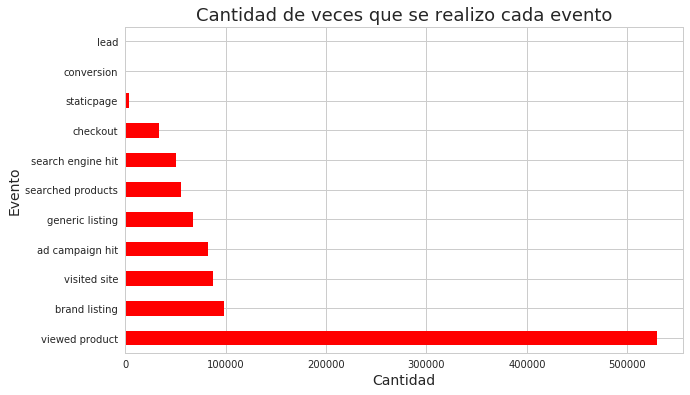

In [8]:
plt.figure(figsize = (10,6))
g = events['event'].value_counts().plot(kind='barh', color='red')
g.set_title('Cantidad de veces que se realizo cada evento',Fontsize = 18)
g.set_ylabel('Evento',Fontsize = 14)
g.set_xlabel('Cantidad',Fontsize = 14)

## Campañas de publicidad

In [9]:
#que campañas se estan usandando y cuales conviene pagar? (si es que son pagas)
campain_hit = events[events['event'] == 'ad campaign hit']
campain_hit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82827 entries, 0 to 1011285
Data columns (total 23 columns):
timestamp                   82827 non-null datetime64[ns]
event                       82827 non-null category
person                      82827 non-null object
url                         82756 non-null object
sku                         0 non-null object
model                       0 non-null object
condition                   0 non-null object
storage                     0 non-null object
color                       0 non-null object
skus                        0 non-null object
search_term                 0 non-null object
staticpage                  0 non-null object
campaign_source             82796 non-null object
search_engine               0 non-null object
channel                     0 non-null object
new_vs_returning            0 non-null object
city                        0 non-null object
region                      0 non-null object
country                     0 n

In [10]:
campain_hit = campain_hit[['timestamp','person','url','campaign_source']]
campain_hit.head()

,timestamp,person,url,campaign_source
0,2018-05-31 23:38:05,0004b0a2,/comprar/iphone/iphone-5s,criteo
6,2018-05-29 13:29:27,0006a21a,/comprar/samsung/galaxy-s8,criteo
11,2018-04-09 20:12:31,000a54b2,/,google
15,2018-05-24 11:21:07,000a54b2,/,google
99,2018-05-17 00:08:56,0019c395,/comprar/samsung/galaxy-j5,google


In [11]:
campain_hit['campaign_source'].value_counts()
#abria que hacer algun grafico pero se puede ver que la campaña de publicidad que mas ayuda es google y apartir de manifest habria que evaluar
#cuanto hay que pagar por la campaña ya que no atrae muchas visitas

google              58153
criteo               9694
rtbhouse             8550
zanox                1673
emblue               1352
FacebookAds           764
afilio                692
bing                  484
voxus                 432
rakuten               310
indexa                154
buscape               141
manifest              126
Facebook               77
datacrush              60
blog                   37
afiliado               34
yotpo                  25
mercadopago            18
FacebookSocial          8
MARKETING SOCIAL        7
onsite                  3
Google Social           1
socialmedia             1
Name: campaign_source, dtype: int64

## Productos y marcas mas buscadas

In [12]:
#que es lo que la gente busca, se podria hacer un top 15 de marcas y modelos
searched_products = events[events['event'] == 'searched products']
searched_products = searched_products[['person','search_term']]

In [13]:
searched_products['search_term'].isnull().value_counts() #que vamos a hacer con estas busquedas que son null? 

False    48967
True      7106
Name: search_term, dtype: int64

Text(0,0.5,'Modelos')

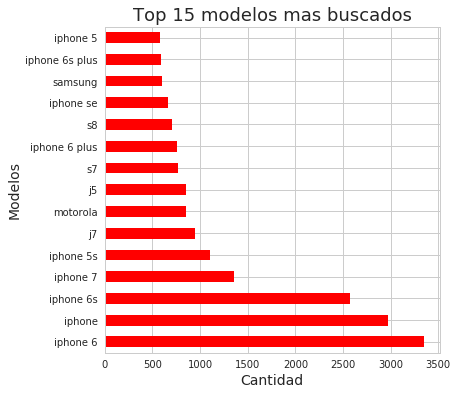

In [14]:
busquedas = searched_products['search_term'].dropna().map(lambda x: x.lower()).value_counts().head(15)
g = plt.subplots(figsize = (6,6))
g = busquedas.plot(kind = 'barh',color='red')
g.set_title('Top 15 modelos mas buscados',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14)

In [15]:
#el diccionario esta hecho a mano, vi las primeras posiciones y de ahi arme el diccionario, se podria pensar algo mejor. 
#no vi por ahora alguna funcion que haga la que defini, por ahi hay algo hecho pero no encontre
marcas = {'iPhone':['iphone','7s','6s','5se','5c','iphone se'], 'Samsung':['j1','j2','j3','j4','j5','j6','j7','galaxy','s7','s6','s5','s8','s9','samsung'], 'Motorola':['moto'],'LG':['lg']}
def asignar_marca(modelo):
    for marca in marcas:
        for m in marcas[marca]:
            if m in modelo:
                return marca
    return 'Otro'
marcas_buscadas = searched_products['search_term'].dropna().map(lambda x: asignar_marca(x.lower())).value_counts()
marcas_buscadas #creo que es bastante que queden 8000 en otro

iPhone      18963
Samsung     14654
Otro         8369
Motorola     5786
LG           1195
Name: search_term, dtype: int64

Text(0,0.5,'Cantidad')

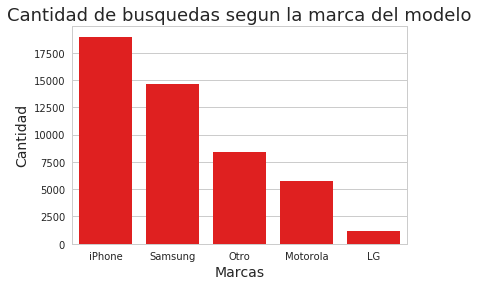

In [16]:
g = sns.barplot(x= marcas_buscadas.index, y=marcas_buscadas.values, orient= 'v',color='red')
g.set_title('Cantidad de busquedas segun la marca del modelo',fontsize = 18)
g.set_xlabel('Marcas',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14)

## Checkout

In [17]:
checkout = events[events['event'] == 'checkout']
checkout = checkout[['timestamp', 'person','model','condition','storage','color']]
checkout.head()

,timestamp,person,model,condition,storage,color
3,2018-05-31 23:38:40,0004b0a2,iPhone 5s,Bom,32GB,Cinza espacial
7,2018-05-29 13:29:35,0006a21a,Samsung Galaxy S8,Bom,64GB,Dourado
44,2018-05-24 11:34:32,000a54b2,Motorola Moto Z Play,Bom,32GB,Preto
85,2018-04-06 05:14:58,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto
86,2018-04-06 05:18:15,00184bf9,Samsung Galaxy J5,Excelente,16GB,Preto


[Text(0,0,'16GB'),
 Text(0,0,'32GB'),
 Text(0,0,'64GB'),
 Text(0,0,'8GB'),
 Text(0,0,'128GB'),
 Text(0,0,'4GB'),
 Text(0,0,'256GB'),
 Text(0,0,'512MB')]

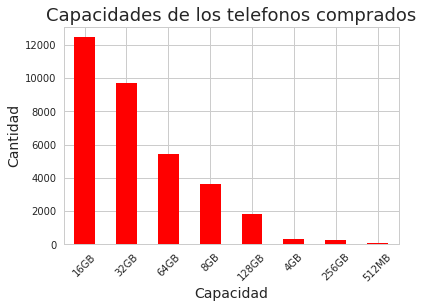

In [18]:
g = checkout['storage'].value_counts().plot(kind = 'bar', color='red')
g.set_title('Capacidades de los telefonos comprados',fontsize = 18)
g.set_xlabel('Capacidad',fontsize = 14)
g.set_ylabel('Cantidad',fontsize = 14)
g.set_xticklabels(g.get_xticklabels(), rotation = 45, fontsize = 10)

Se puede ver que los telefonos de 16GB/32GB/64GB/128GB son los mas comprados, mientras que los de menor capacidad no tiene una alta demanda, se recomienda tener mas stock de estos telefonos

Text(0,0.5,'Modelos')

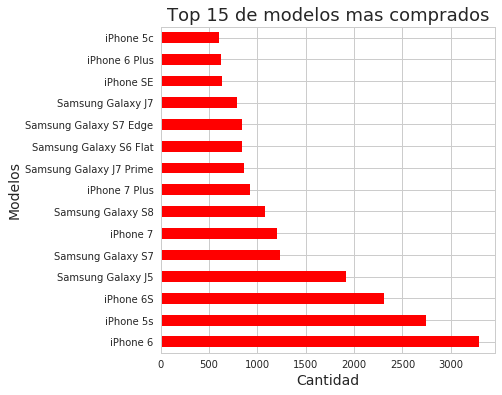

In [19]:
compras = checkout['model'].value_counts().head(15)
g = plt.subplots(figsize = (6,6))
g = compras.plot(kind = 'barh', color = 'red')
g.set_title('Top 15 de modelos mas comprados',fontsize = 18)
g.set_xlabel('Cantidad',fontsize = 14)
g.set_ylabel('Modelos',fontsize = 14) #Estaria bueno superponer este grafico con el otro para compara el ranking de busqueda contra compra
                                      #y sacar conclusiones

Al igual que los modelos mas buscados, los iPhone son los telefonos mas demandados. En segundo lugar estan los Samsung galazy S7, S8 y J5. 

In [20]:
#Se podria analizar las marcas y comparar tambien
#Conviene hacer un grafico de los modelos mas comprados teniendo en cuenta sus capacidades?

#### ¿Los clientes quedan conformes con el servicio brindado?

In [21]:
checkout['person'].value_counts().mean() #en promedio la persona que compro una ves no esta volviendo a comprar, se esta haciendo
                                         #poca publicidad sobre la gente que ya compro? Estan quedando satisfechos con el servicio?
#se podria hacer un grafico de la cantidad de personas que compraron 1,2,3...,n veces

1.22122067767159

Text(0,0.5,'Cantidad de clientes')

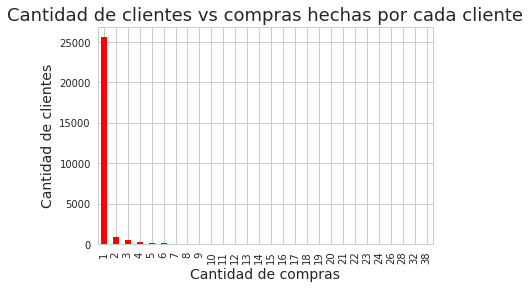

In [22]:
g = checkout['person'].value_counts().value_counts().sort_index().plot(kind = 'bar', color='red')
g.set_title('Cantidad de clientes vs compras hechas por cada cliente',fontsize = 18)
g.set_xlabel('Cantidad de compras',fontsize = 14)
g.set_ylabel('Cantidad de clientes',fontsize = 14)

Se puede ver en el grafico que la gran mayoria de los compadores no vuelven a comprar, se podria realizar algun tipo de encuesta para saber si quedan satisfechos con el serviocio brindado

In [23]:
checkout['person'].value_counts().mean()

1.22122067767159

#### ¿Cuando hay mayor actividad en las ventas a lo largo del mes?

Text(0,0.5,'Dia')

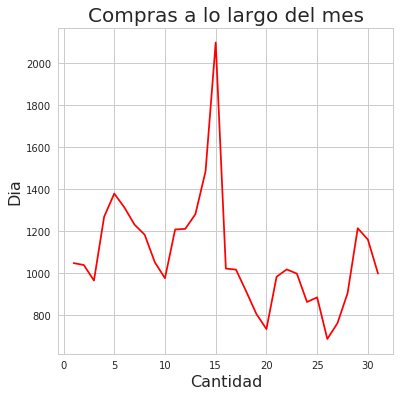

In [24]:
compras = checkout['timestamp'].dt.day.value_counts().sort_index()
g = plt.subplots(figsize = (6,6))
g = compras.plot(color='red')
g.set_title('Compras a lo largo del mes',fontsize = 20)
g.set_xlabel('Cantidad',fontsize = 16)
g.set_ylabel('Dia',fontsize = 16)

In [25]:
#Sacar concluciones

In [26]:
#Se puede hacer las compras a lo largo del año
checkout['timestamp'].dt.year.value_counts()

2018    33735
Name: timestamp, dtype: int64

## Trafico de la pagina

In [27]:
dia_vs_hora = pd.DataFrame({'dia': events['timestamp'].dt.weekday_name,'hora':events['timestamp'].dt.hour})
dia_vs_hora.head()

,dia,hora
0,Thursday,23
1,Thursday,23
2,Thursday,23
3,Thursday,23
4,Tuesday,13


In [28]:
dias_vs_horas = pd.DataFrame(dia_vs_hora.groupby('dia')['hora'].value_counts().sort_index())
dias_vs_horas = dias_vs_horas.rename(columns = {'hora':'visitas'}) 
dias_vs_horas = dias_vs_horas.reset_index()
dias_vs_horas.head()

,dia,hora,visitas
0,Friday,0,10357
1,Friday,1,8485
2,Friday,2,7491
3,Friday,3,5387
4,Friday,4,2982


In [29]:
dias_vs_horas = dias_vs_horas.pivot('hora','dia','visitas')
dias_vs_horas = dias_vs_horas[['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']]
dias_vs_horas.head()

dia,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
hora,,,,,,,
0,6858,11122,10422,10155,10357,9211,6253
1,6578,10618,9727,9680,8485,7600,6290
2,5068,8604,7747,7807,7491,6535,5284
3,3226,5380,5316,5599,5387,4560,3650
4,2002,3453,2529,2938,2982,2580,2354


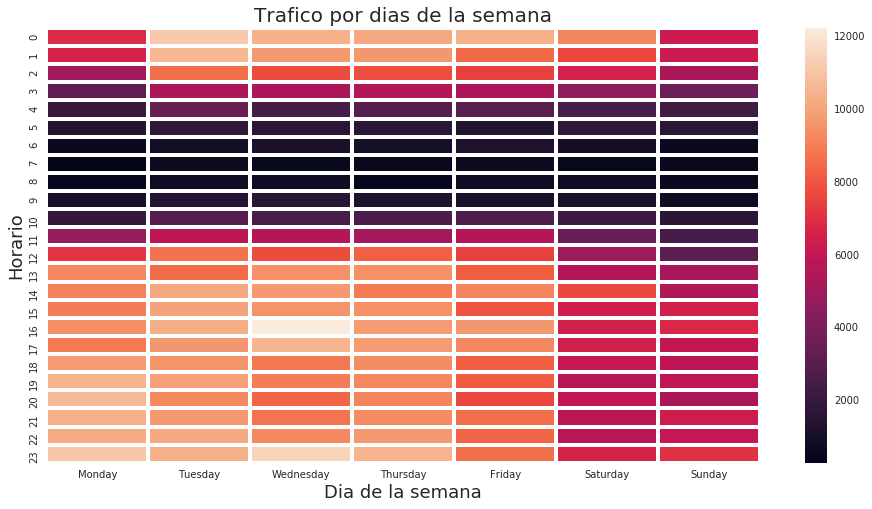

In [30]:
plt.figure(figsize = (16,8))
ax = sns.heatmap(dias_vs_horas,linewidth = 3)
ax.set_title('Trafico por dias de la semana',Fontsize = 20)
ax.set_xlabel('Dia de la semana',Fontsize = 18)
ax.set_ylabel('Horario',fontsize = 18);

Se puede observar que el mayor trafico ocurre de Lunes a Viernes apartir de las 12pm hasta la 1am del dia siguiente. En caso de tener que hacer alguna migracion o matenimiento de la pagina seria conveniente hacerlo entre las 3am-9am.

In [31]:
#Se puede investigar mas sobre los tipos de evento y las fechas, ej es verdad que a principio de mes la gente suele comprar mas? 
#si es asi, conviene hacer mas publicidad?